In [1]:
from tools import report
from tools import util
import json
import pandas as pd

# Dimensionality reduction techniques
from sklearn.decomposition import PCA, NMF
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

%matplotlib inline

In [2]:
X, y = util.load_dataset("./processed/iris.json") 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
pipeline = Pipeline(steps=[ ('reduce_dim', PCA()),
                            ('classify', SVC())])

In [4]:
classifier = report.train(X_train, y_train, pipeline)

In [5]:
classifier

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

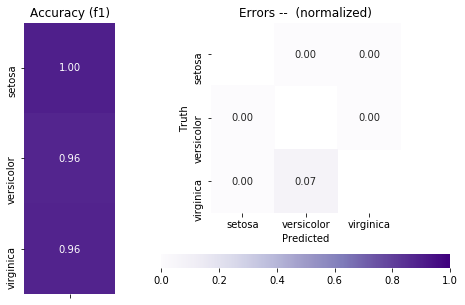

In [6]:
df = report.detail(X_test, y_test, classifier)

In [7]:
has = {'reduce_dim': [PCA()]}
none = {'reduce_dim': [None]}
classifiers = report.train(X_train, y_train, pipeline, With_reduction=has, No_reduction=none)

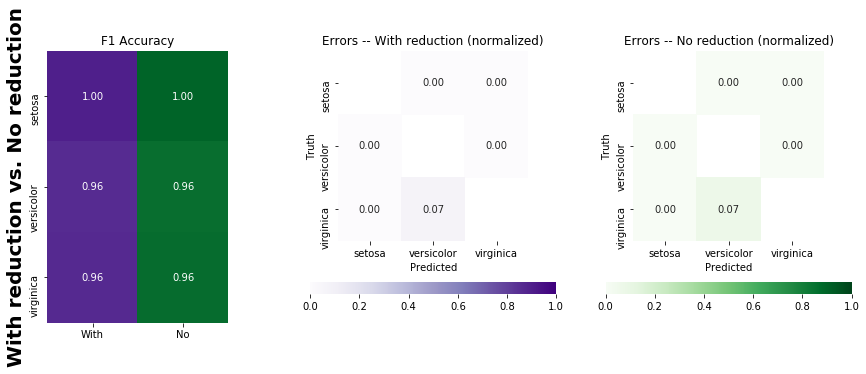

In [8]:
df = report.compare(X_test, y_test, **classifiers)

In [9]:
# Look at many different classifiers with and without reduction in the pipeline
with_reduction, no_reduction = report.reduction_impact(pipeline, X_train, y_train, **report.classifiers)

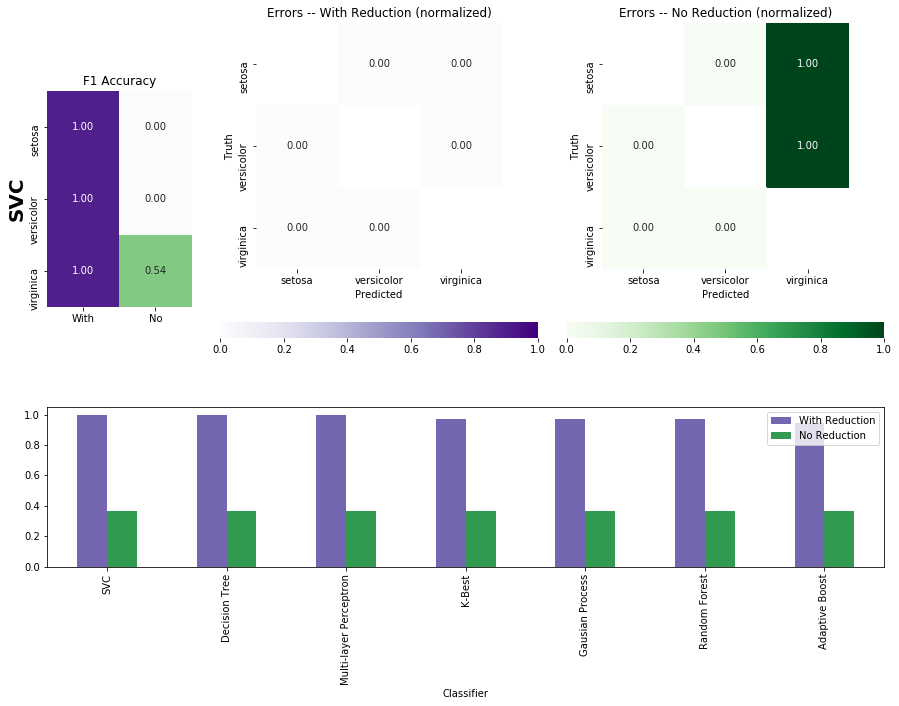

In [10]:
#  Many different with/with-out cases
# "Best" case is given detail treatment
df = report.summary(X_test, y_test, with_reduction, no_reduction)

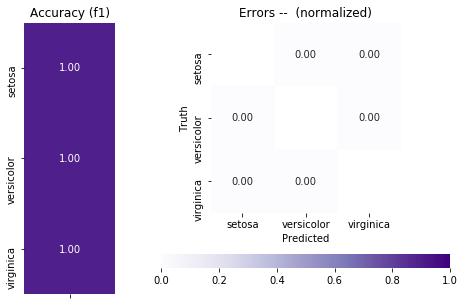

In [11]:
# Details on a single trained classifier
df = report.detail(X_test, y_test, with_reduction["SVC"], normalize=True)

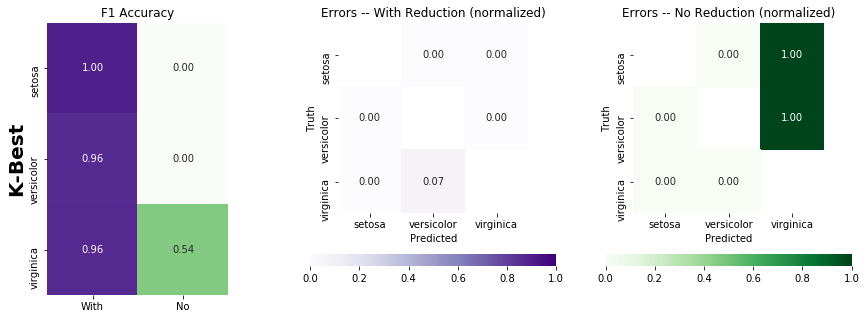

In [12]:
# Compare one key from two different sets
df = report.compare(X_test, y_test, "K-Best", With_Reduction=with_reduction, No_Reduction=no_reduction)

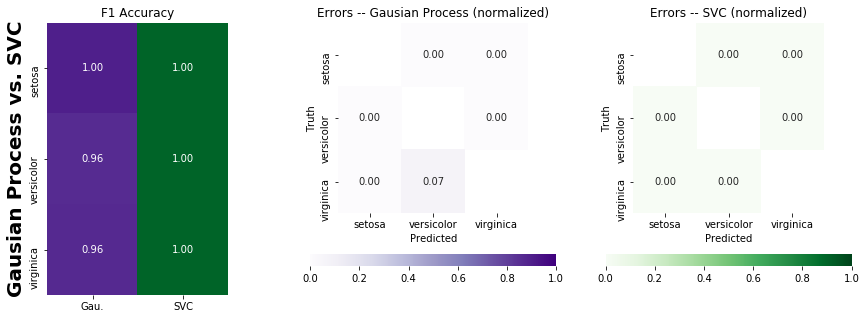

In [13]:
# Compare two keys from a single set.
df = report.compare(X_test, y_test, "Gausian Process", "SVC", with_reduction)

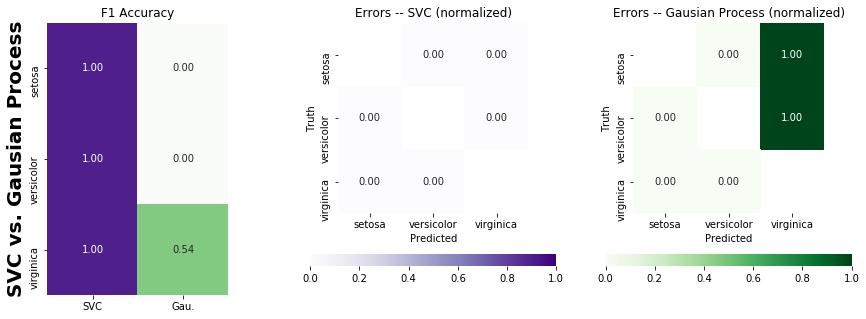

In [14]:
# Compare two trained classifiers.  The label of the classifier is the keyword (with _ for spaces)
df = report.compare(X_test, y_test, SVC=with_reduction["SVC"], Gausian_Process=no_reduction["Gausian Process"])

In [15]:
# Show details on the best classifier
report.config(with_reduction, X=X_test, y=y_test)

{'classify': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'classify__C': 1,
 'classify__gamma': 'auto',
 'classify__kernel': 'linear'}

In [16]:
report.config(with_reduction, "Decision Tree")

{'classify': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='random'),
 'classify__criterion': 'entropy',
 'classify__max_depth': 5,
 'classify__splitter': 'random'}